경로 이동

In [17]:
from IPython.display import Image

![title](\\10.28.51.43\mpbel\Meeting Materials\Kanghoun/{0EB2D010-9F5B-4C49-AD53-6C90F7063A9D}.png) # markdown안에서 나오게 할 때 

In [22]:
cd C:\Users\razer\Desktop\new_npy\P001_HN1_RTst_2018-11-01_102652_RT^01.RT.Head.Neck.(Adult)_re_n1__00000/

C:\Users\razer\Desktop\new_npy\P001_HN1_RTst_2018-11-01_102652_RT^01.RT.Head.Neck.(Adult)_re_n1__00000


segmentation된 폴더에서 nifti image를 가져오자

In [23]:
import numpy as np
import glob
import os
from skimage import measure
import nibabel as nib
import matplotlib.pyplot as plt
from vtkplotter import Volume
import pydicom
object_dir = r'C:\Users\razer\Desktop\new_npy\P001_HN1_RTst_2018-11-01_102652_RT^01.RT.Head.Neck.(Adult)_re_n1__00000/'
img = glob.glob('*.nii.gz')

In [24]:
img

['image.nii.gz',
 'mask_brain_stem.nii.gz',
 'mask_esophagus.nii.gz',
 'mask_larynx.nii.gz',
 'mask_L_cochlea.nii.gz',
 'mask_L_eye.nii.gz',
 'mask_L_lens.nii.gz',
 'mask_L_optic_nerve.nii.gz',
 'mask_L_parotidG.nii.gz',
 'mask_L_SMG.nii.gz',
 'mask_L_TMJ.nii.gz',
 'mask_mandible.nii.gz',
 'mask_optic_chiasm.nii.gz',
 'mask_optic_pathway.nii.gz',
 'mask_oral_cavity.nii.gz',
 'mask_pharynx.nii.gz',
 'mask_R_cochlea.nii.gz',
 'mask_R_eye.nii.gz',
 'mask_R_lens.nii.gz',
 'mask_R_optic_nerve.nii.gz',
 'mask_R_parotidG.nii.gz',
 'mask_R_SMG.nii.gz',
 'mask_R_TMJ.nii.gz',
 'mask_spinal_cord.nii.gz',
 'mask_thyroid.nii.gz']

segmentation된 이미지를 한 곳에 다 몰아보자

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

image.nii.gz영상입니다.


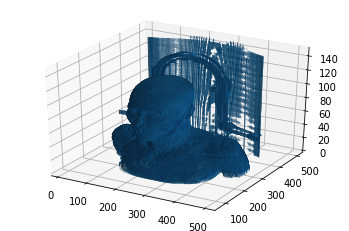

mask_brain_stem.nii.gz영상입니다.


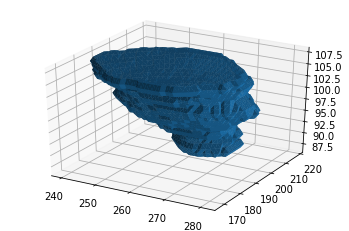

mask_esophagus.nii.gz영상입니다.


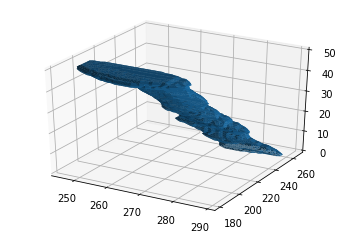

mask_larynx.nii.gz영상입니다.


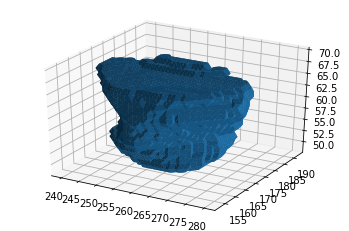

mask_L_cochlea.nii.gz영상입니다.


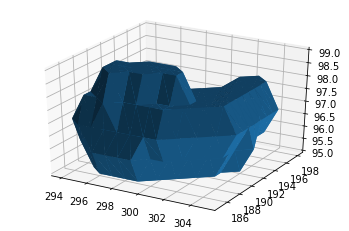

mask_L_eye.nii.gz영상입니다.


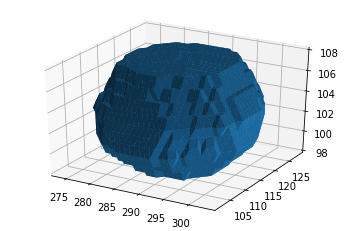

mask_L_lens.nii.gz영상입니다.


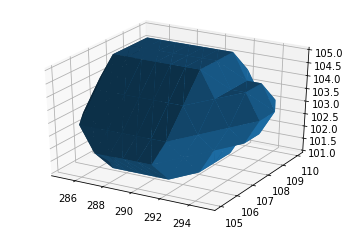

mask_L_optic_nerve.nii.gz영상입니다.


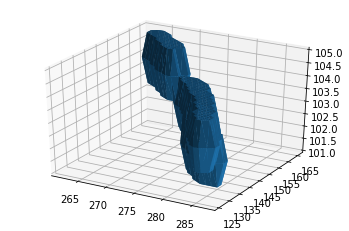

mask_L_parotidG.nii.gz영상입니다.


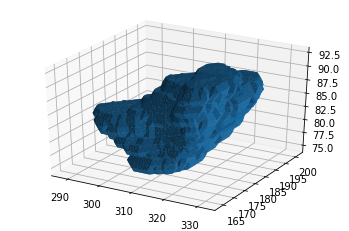

mask_L_SMG.nii.gz영상입니다.


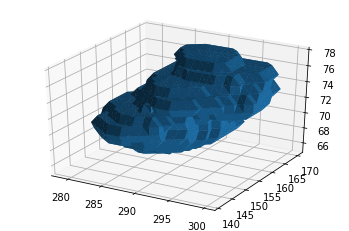

mask_L_TMJ.nii.gz영상입니다.


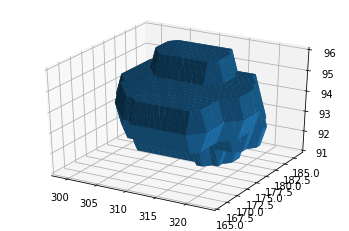

mask_mandible.nii.gz영상입니다.


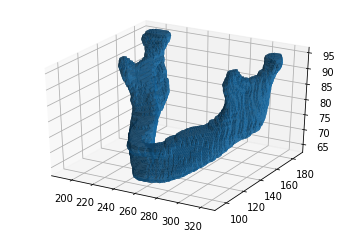

mask_optic_chiasm.nii.gz영상입니다.


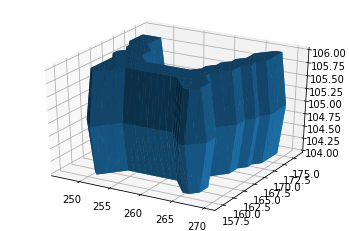

mask_optic_pathway.nii.gz영상입니다.


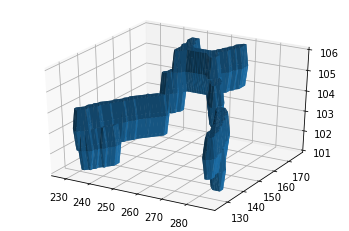

mask_oral_cavity.nii.gz영상입니다.


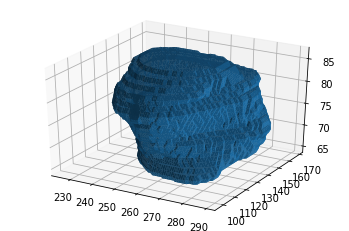

mask_pharynx.nii.gz영상입니다.


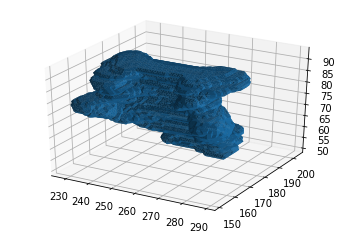

mask_R_cochlea.nii.gz영상입니다.


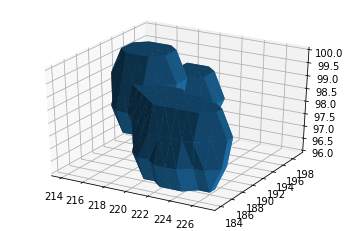

mask_R_eye.nii.gz영상입니다.


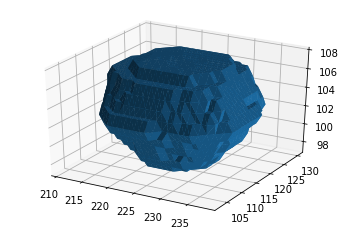

mask_R_lens.nii.gz영상입니다.


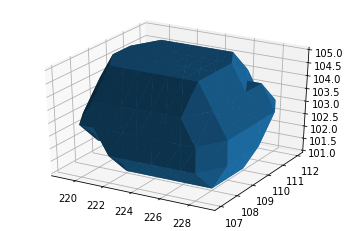

mask_R_optic_nerve.nii.gz영상입니다.


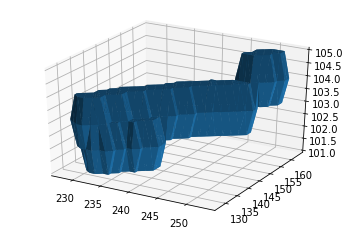

mask_R_parotidG.nii.gz영상입니다.


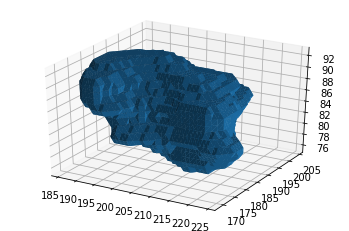

mask_R_SMG.nii.gz영상입니다.


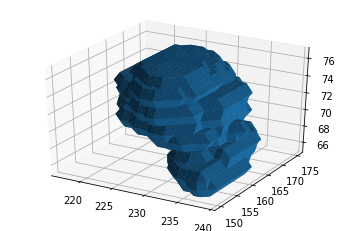

mask_R_TMJ.nii.gz영상입니다.


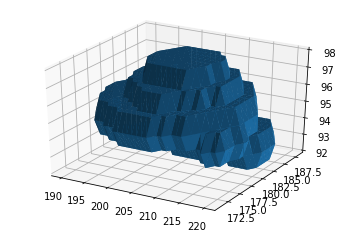

mask_spinal_cord.nii.gz영상입니다.


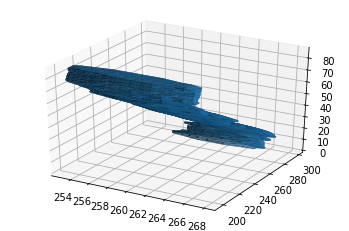

mask_thyroid.nii.gz영상입니다.


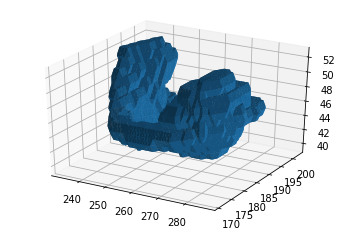

In [14]:
import numpy as np
import nibabel as nib
fulldataset = [] #segmentation된 데이터들을 다 더한 영상
k= {} # segmentation된 이미지들을 각각 저장하기위해 key: segmentation된 부위, value : 3d array
segimg=[] # 잠깐 리스트 내용에 받아오는 과정
segmented_image_all = []
for i in img[0:]: #img의 리스트를 for문을 돌림
    img_translate = nib.load(i) #nii data로드
    k[i] = np.array(img_translate.dataobj) #array화
    verts, faces, normals, values = measure.marching_cubes_lewiner(k[i], 0) #skilearn measure 참고 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                linewidth=0.2, antialiased=True)
    print( i +'영상입니다.')
    plt.show()
    a = k[i].shape[0]
    b = k[i].shape[1]
    c = k[i].shape[2]
    segimg = np.full((a,b,c),0) 
    segimg += k[i]
    fulldataset.append(k)
    
    

In [7]:
fulldataset

[{'image.nii.gz': array([[[-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          ...,
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024]],
  
         [[-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          ...,
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024]],
  
         [[-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          [-1024, -1024, -1024, ..., -1024, -1024, -1024],
          ...,
          [-1024, -1024, -1024, ..., -1024, -1

In [15]:
for i in img[1:]: #segimg에 다 저장하는 과정
    segimg += k[i]



In [16]:

Volume(k['image.nii.gz']+15*segimg).show(bg="black") #원래 영상에다가 segimg를 15배해서 강조해서넣어줌

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[262.87863808571745…